# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [16]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE      
        
        positions[0]=self.pos
        for i in range(1,n+1):
            positions[i]=self.pickStep()+positions[i-1]
            
                
        
        
        return positions



In [17]:
print(pos_test)

[[ 0.  0.]
 [-1.  0.]
 [-1. -1.]
 [-2. -1.]
 [-2.  0.]
 [-2.  1.]
 [-1.  1.]
 [-1.  2.]
 [ 0.  2.]
 [ 1.  2.]
 [ 0.  2.]]


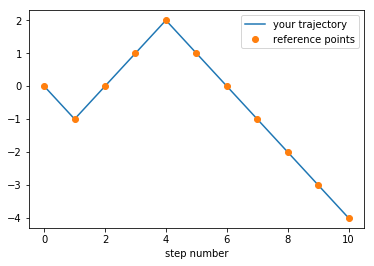

In [4]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

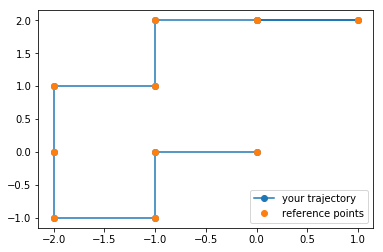

In [5]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

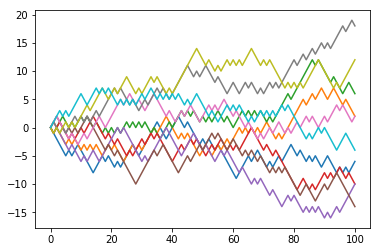

In [6]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


[1257.72]


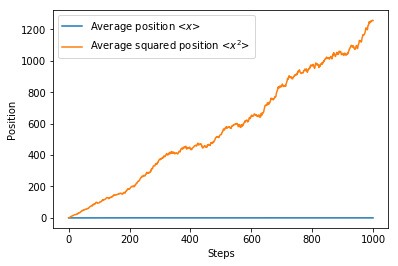

In [7]:
nsteps = 1000
ndim = 1
nwalkers = 100

positions=[]
avgpos=[]
squaredposition=[0]

for i in range(nwalkers):
    positions=w.doSteps(1000)
    squaredposition=(w.doSteps(1000))**2+squaredposition


avgpos=positions/100

averagesquaredposition=squaredposition/100
print(max(averagesquaredposition))

ns=numpy.arange(0,1001)

plt.plot(ns,avgpos,label='Average position <$x$>')
plt.plot(ns,averagesquaredposition,label='Average squared position <$x^2$>')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()

#positions=numpy.ndarray((nsteps+1,ndim),dtype='f')
#positions[0]=0
#for j in range(0,nwalkers):
#    for i in range(1,nsteps):
#        positions[i]=w.doSteps(nsteps)[i]
#avgpos=positions/nwalkers
#print(avgpos)
#return avgpos

        

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


In [20]:
w = walker(numpy.zeros(2), ndim=2)
w.ndim=2
squaredposition2=numpy.zeros([4,2])
position2=numpy.zeros([4])
for i in range(3):
    x=w.doSteps(3)
    print(x)
    squaredposition2[:,0]=x[:,0]**2+squaredposition2[:,0]
    squaredposition2[:,1]=x[:,1]**2+squaredposition2[:,1]
    print(squaredposition2)
    position2=squaredposition2[:,0]+squaredposition2[:,1]
    asp2=position2/10
    
w.possibleSteps

[[0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]]
[[0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]]
[[ 0.  0.]
 [-1.  0.]
 [-1. -1.]
 [-2. -1.]]
[[0. 0.]
 [1. 1.]
 [1. 1.]
 [5. 1.]]
[[ 0.  0.]
 [ 0. -1.]
 [ 1. -1.]
 [ 0. -1.]]
[[0. 0.]
 [1. 2.]
 [2. 2.]
 [5. 2.]]


[array([-1.,  0.], dtype=float32),
 array([1., 0.]),
 array([ 0., -1.], dtype=float32),
 array([0., 1.])]

Text(0,0.5,'Average Squared Position')

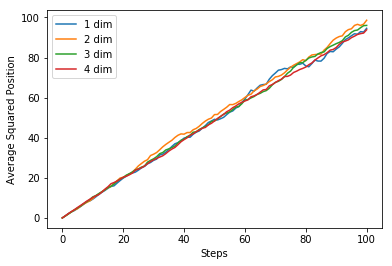

In [24]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

avgpos=[]
position=numpy.zeros([101])
position2=numpy.zeros([101])
position3=numpy.zeros([101])
position4=numpy.zeros([101])
squaredposition=numpy.zeros([101,1])
squaredposition2=numpy.zeros([101,2])
squaredposition3=numpy.zeros([101,3])
squaredposition4=numpy.zeros([101,4])


for i in range(nwalkers):
    w = walker(numpy.zeros(1), ndim=1)
    squaredposition=(w.doSteps(100))**2+squaredposition
    position=squaredposition
    asp=position/400
    
for i in range(nwalkers):
    w = walker(numpy.zeros(2), ndim=2)
    squaredposition2[:,0]=w.doSteps(100)[:,0]**2+squaredposition2[:,0]
    squaredposition2[:,1]=w.doSteps(100)[:,1]**2+squaredposition2[:,1]
    position2=squaredposition2[:,0]+squaredposition2[:,1]
    asp2=position2/400

for i in range(nwalkers):
    w = walker(numpy.zeros(3), ndim=3)
    squaredposition3[:,0]=w.doSteps(100)[:,0]**2+squaredposition3[:,0]
    squaredposition3[:,1]=w.doSteps(100)[:,1]**2+squaredposition3[:,1]
    squaredposition3[:,2]=w.doSteps(100)[:,2]**2+squaredposition3[:,2]
    position3=squaredposition3[:,0]+squaredposition3[:,1]+squaredposition3[:,2]
    asp3=position3/400
    
for i in range(nwalkers):
    w = walker(numpy.zeros(4), ndim=4)
    squaredposition4[:,0]=w.doSteps(100)[:,0]**2+squaredposition4[:,0]
    squaredposition4[:,1]=w.doSteps(100)[:,1]**2+squaredposition4[:,1]
    squaredposition4[:,2]=w.doSteps(100)[:,2]**2+squaredposition4[:,2]
    squaredposition4[:,3]=w.doSteps(100)[:,3]**2+squaredposition4[:,3]
    position4=squaredposition4[:,0]+squaredposition4[:,1]+squaredposition4[:,2]+squaredposition4[:,3]
    asp4=position4/400

ns=numpy.arange(0,101)    

plt.plot(ns,asp,label='1 dim')
plt.plot(ns,asp2,label='2 dim')
plt.plot(ns,asp3,label='3 dim')
plt.plot(ns,asp4,label='4 dim')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Squared Position')





## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


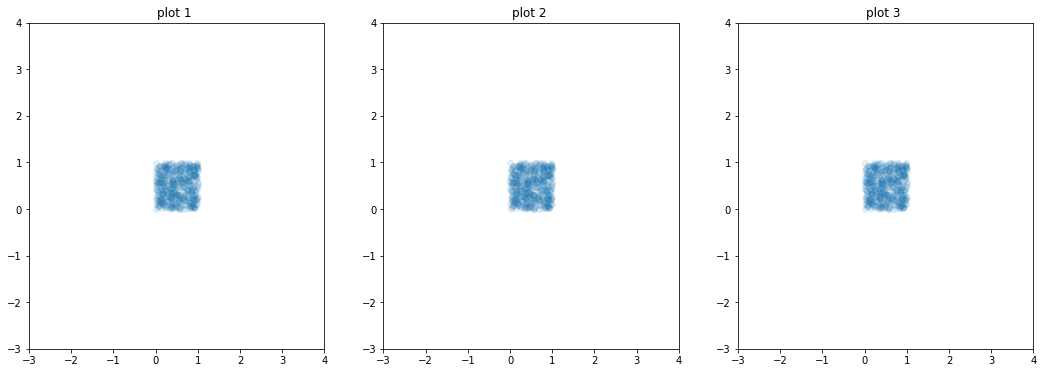

In [25]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)